In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle_zillow import wrangle_zillow, scaled_zillow_columns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train, validate, test = wrangle_zillow()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28525 entries, 47592 to 42185
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28525 non-null  int64  
 1   bedroomcnt                    28525 non-null  float64
 2   buildingqualitytypeid         28525 non-null  float64
 3   calculatedfinishedsquarefeet  28525 non-null  float64
 4   fireplacecnt                  28525 non-null  float64
 5   latitude                      28525 non-null  float64
 6   longitude                     28525 non-null  float64
 7   poolcnt                       28525 non-null  float64
 8   regionidcity                  28525 non-null  float64
 9   regionidzip                   28525 non-null  float64
 10  roomcnt                       28525 non-null  float64
 11  transactiondate               28525 non-null  object 
 12  age                           28525 non-null  float64
 1

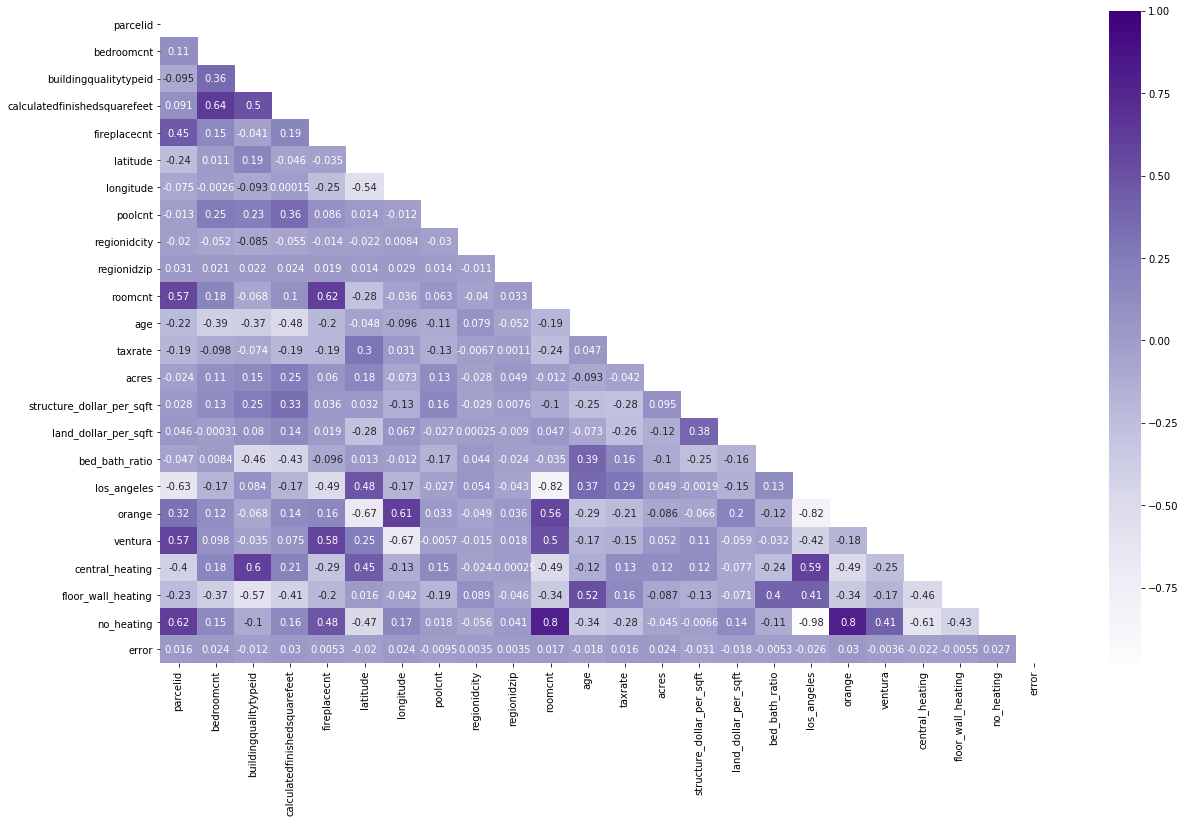

In [4]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap='Purples', annot=True, mask=mask)
plt.show()

In [5]:
train_scaled, validate_scaled, test_scaled = scaled_zillow_columns()

In [6]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28525 entries, 47592 to 42185
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   parcelid                             28525 non-null  int64  
 1   transactiondate                      28525 non-null  object 
 2   los_angeles                          28525 non-null  uint8  
 3   orange                               28525 non-null  uint8  
 4   ventura                              28525 non-null  uint8  
 5   central_heating                      28525 non-null  uint8  
 6   floor_wall_heating                   28525 non-null  uint8  
 7   no_heating                           28525 non-null  uint8  
 8   error                                28525 non-null  float64
 9   bedroomcnt_scaled                    28525 non-null  float64
 10  buildingqualitytypeid_scaled         28525 non-null  float64
 11  calculatedfinishedsquare

In [7]:
X = train.drop(columns=['parcelid', 'transactiondate', 'error'])
y = train[['error']]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [9]:
lm = LinearRegression()
rfe_ = RFE(lm, 1)
rfe_.fit(X, y)
ranks = rfe_.ranking_
names = X.columns.tolist()
pd.DataFrame({'features': names, 'rank': ranks}).set_index('rank')

,features
rank,
10,bedroomcnt
12,buildingqualitytypeid
18,calculatedfinishedsquarefeet
13,fireplacecnt
21,latitude
22,longitude
9,poolcnt
20,regionidcity
19,regionidzip
